<h1 align="center">Vector Analysis of Demographic Data</h1>
<h3 align="center">Jonah Williams</h3>

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from descartes import PolygonPatch
import matplotlib.patches as mpatches
from json import loads
from scipy.stats import entropy

%matplotlib inline

In [85]:
data = pd.read_csv("/Users/jonahwilliams/pdb2014bgv9_us.csv")
data = data[data.State_name == 'Nebraska']
data = data.reset_index()
data.head()

,index,GIDBG,State,State_name,County,County_name,Tract,Block_Group,Flag,LAND_AREA,...,pct_TEA_MailOutMailBack_CEN_2010,pct_TEA_Update_Leave_CEN_2010,pct_Census_Mail_Returns_CEN_2010,pct_Vacant_CEN_2010,pct_Deletes_CEN_2010,pct_Census_UAA_CEN_2010,pct_Mailback_Count_CEN_2010,pct_FRST_FRMS_CEN_2010,pct_RPLCMNT_FRMS_CEN_2010,pct_BILQ_Mailout_count_CEN_2010
0,115538,310019654001,31,Nebraska,1,Adams County,965400,1,NaN,63.175,...,100,0,84.00,1.26,0,7.37,91.37,84.00,0.00,0
1,115539,310019654002,31,Nebraska,1,Adams County,965400,2,NaN,101.744,...,100,0,74.13,1.56,0,12.85,85.59,74.13,0.00,0
2,115540,310019654003,31,Nebraska,1,Adams County,965400,3,NaN,17.138,...,100,0,79.97,0.86,0,9.84,89.29,79.97,0.00,0
3,115541,310019655001,31,Nebraska,1,Adams County,965500,1,NaN,3.492,...,100,0,84.80,2.42,0,4.63,92.95,84.58,0.22,0
4,115542,310019655002,31,Nebraska,1,Adams County,965500,2,NaN,0.227,...,100,0,77.83,1.23,0,6.90,91.87,77.83,0.00,0


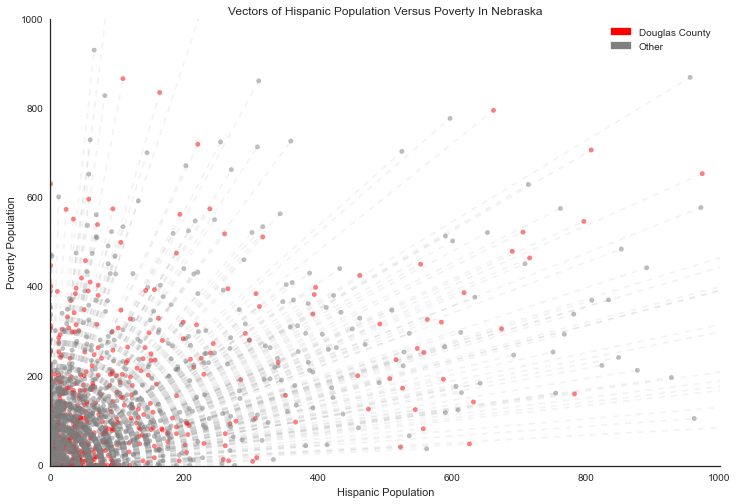

In [58]:
import numpy as np
import matplotlib.pyplot as plt
sns.set_style("white")
plt.figure(figsize=(12,8))

colors = ['grey','red']
C  =  map(lambda x: colors[x], map(lambda x: int(x == 'Douglas County'), data['County_name'].values))
X2 = data['Hispanic_ACS_08_12'].values
Y2 = data['Prs_Blw_Pov_Lev_ACS_08_12'].values
X1 = np.zeros_like(X1)
Y1 = np.zeros_like(X2)

plt.scatter(X2, Y2, color=C,alpha=0.5)
plt.plot(np.array([X1, X2]), np.array([Y1, Y2]), color="grey", alpha=0.1, linestyle='--')
plt.xlim([-1,1000])
plt.ylim([-1,1000])

patch_1 = mpatches.Patch(color="red", label='Douglas County')
patch_2 = mpatches.Patch(color="grey", label='Other')
plt.legend(handles=[patch_1, patch_2])
plt.title("Vectors of Hispanic Population Versus Poverty In Nebraska")
plt.xlabel("Hispanic Population")
plt.ylabel("Poverty Population")

sns.despine()
plt.draw()
plt.show()

In [132]:
computed = np.zeros((len(sub_data), len(sub_data)))

sub_data = data[['Hispanic_ACS_08_12','Prs_Blw_Pov_Lev_ACS_08_12']].astype(int).values
sub_data = sub_data + 1
norms = np.linalg.norm(sub_data, axis=1)
for i in xrange(len(sub_data)):
    for j in xrange(i, len(sub_data)):
        v1 = sub_data[i]
        v2 = sub_data[j]
        m1 = norms[i]
        m2 = norms[j]
        part = np.dot(v1, v2) / (m1 * m2)
        computed[i, j] = part
        computed[j, i] = part
computed = np.arccos(computed)
computed = np.nan_to_num(computed)

In [153]:
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
SC_1 = SpectralClustering(n_clusters=2, eigen_solver=None, random_state=None,
                        n_init=10, gamma=1.0, affinity='precomputed', n_neighbors=10,
                        eigen_tol=0.0, assign_labels='kmeans', degree=3, coef0=1,
                        kernel_params=None)

SC_2 = SpectralClustering(n_clusters=4, eigen_solver=None, random_state=None,
                        n_init=10, gamma=1.0, affinity='precomputed', n_neighbors=10,
                        eigen_tol=0.0, assign_labels='kmeans', degree=3, coef0=1,
                        kernel_params=None)

AP_1 = AffinityPropagation(damping=0.5, max_iter=200,
                           convergence_iter=15, copy=True,
                           preference=None, affinity='precomputed', verbose=False)

AP_2 = AffinityPropagation(damping=1, max_iter=200,
                           convergence_iter=15, copy=True,
                           preference=None, affinity='precomputed', verbose=False)

In [154]:
#data['SC1'] = SC_1.fit_predict(computed)
#data['SC2'] = SC_2.fit_predict(computed)
#data['AP1'] = AP_1.fit_predict(computed)
data['AP2'] = AP_1.fit_predict(computed)

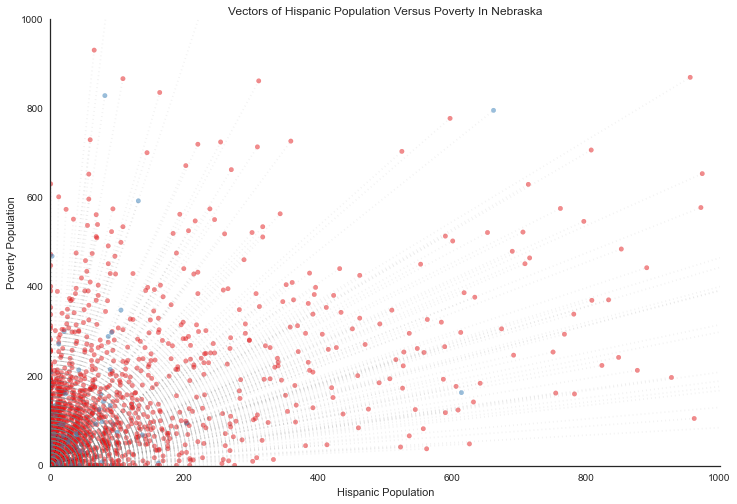

In [150]:
sns.set_style("white")
plt.figure(figsize=(12,8))

colors = ["#e41a1c", "#377eb8", "#4daf4a", "#984ea3"]
C  =  map(lambda x: colors[x], data['SC1'])
X2 = data['Hispanic_ACS_08_12'].values
Y2 = data['Prs_Blw_Pov_Lev_ACS_08_12'].values
X1 = np.zeros_like(X1)
Y1 = np.zeros_like(X2)

plt.scatter(X2, Y2, color=C,alpha=0.5)
plt.plot(np.array([X1, X2]), np.array([Y1, Y2]), color="grey", alpha=0.1, linestyle=':')
plt.xlim([-1,1000])
plt.ylim([-1,1000])

#patch_1 = mpatches.Patch(color="red", label='Douglas County')
#patch_2 = mpatches.Patch(color="grey", label='Other')
#plt.legend(handles=[patch_1, patch_2])
plt.title("Vectors of Hispanic Population Versus Poverty In Nebraska")
plt.xlabel("Hispanic Population")
plt.ylabel("Poverty Population")

sns.despine()
plt.draw()
plt.show()

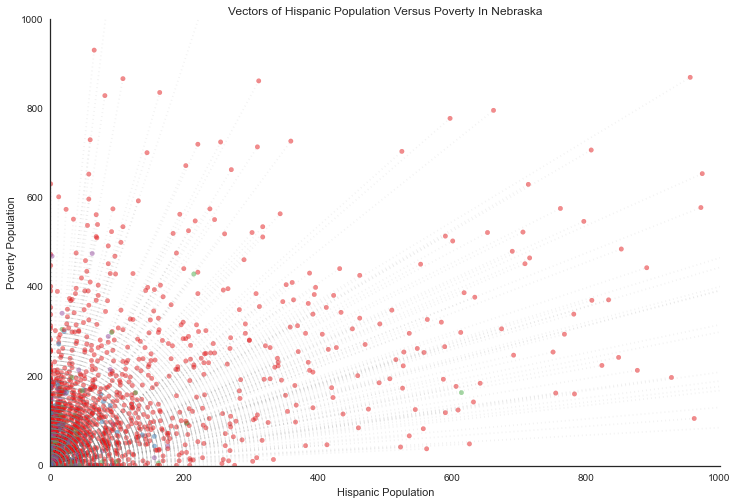

In [151]:
sns.set_style("white")
plt.figure(figsize=(12,8))

colors = ["#e41a1c", "#377eb8", "#4daf4a", "#984ea3"]
C  =  map(lambda x: colors[x], data['SC2'])
X2 = data['Hispanic_ACS_08_12'].values
Y2 = data['Prs_Blw_Pov_Lev_ACS_08_12'].values
X1 = np.zeros_like(X1)
Y1 = np.zeros_like(X2)

plt.scatter(X2, Y2, color=C,alpha=0.5)
plt.plot(np.array([X1, X2]), np.array([Y1, Y2]), color="grey", alpha=0.1, linestyle=':')
plt.xlim([-1,1000])
plt.ylim([-1,1000])

#patch_1 = mpatches.Patch(color="red", label='Douglas County')
#patch_2 = mpatches.Patch(color="grey", label='Other')
#plt.legend(handles=[patch_1, patch_2])
plt.title("Vectors of Hispanic Population Versus Poverty In Nebraska")
plt.xlabel("Hispanic Population")
plt.ylabel("Poverty Population")

sns.despine()
plt.draw()
plt.show()

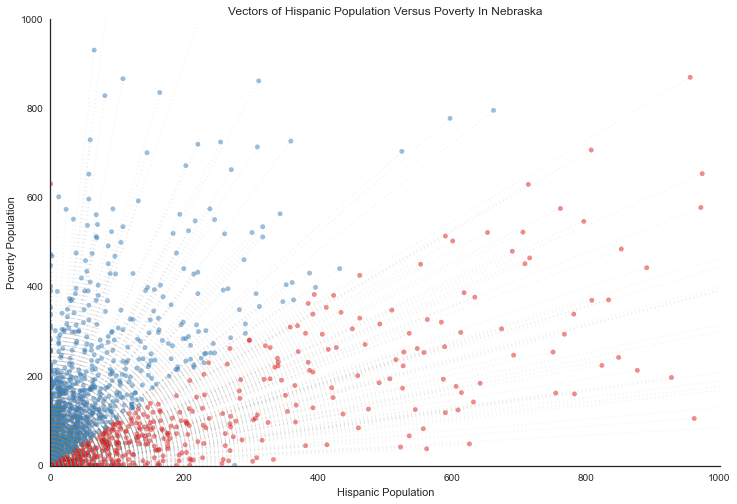

In [152]:
sns.set_style("white")
plt.figure(figsize=(12,8))

colors = ["#e41a1c", "#377eb8", "#4daf4a", "#984ea3"]
C  =  map(lambda x: colors[x], data['AP1'])
X2 = data['Hispanic_ACS_08_12'].values
Y2 = data['Prs_Blw_Pov_Lev_ACS_08_12'].values
X1 = np.zeros_like(X1)
Y1 = np.zeros_like(X2)

plt.scatter(X2, Y2, color=C,alpha=0.5)
plt.plot(np.array([X1, X2]), np.array([Y1, Y2]), color="grey", alpha=0.1, linestyle=':')
plt.xlim([-1,1000])
plt.ylim([-1,1000])

#patch_1 = mpatches.Patch(color="red", label='Douglas County')
#patch_2 = mpatches.Patch(color="grey", label='Other')
#plt.legend(handles=[patch_1, patch_2])
plt.title("Vectors of Hispanic Population Versus Poverty In Nebraska")
plt.xlabel("Hispanic Population")
plt.ylabel("Poverty Population")

sns.despine()
plt.draw()
plt.show()

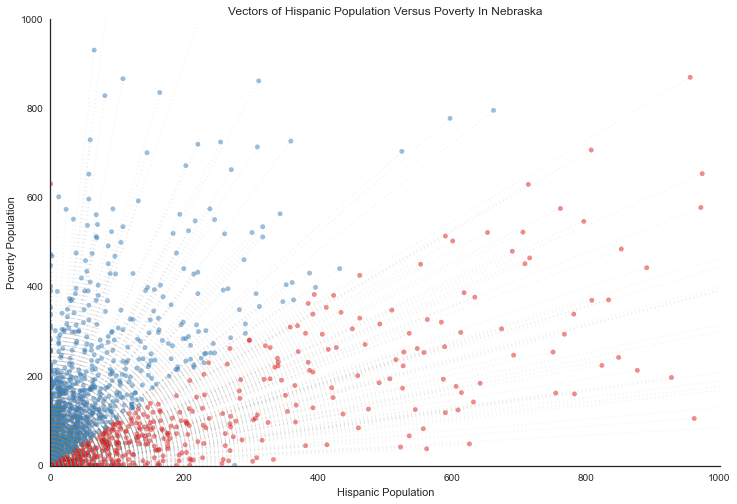

In [155]:
sns.set_style("white")
plt.figure(figsize=(12,8))

colors = ["#e41a1c", "#377eb8", "#4daf4a", "#984ea3"]
C  =  map(lambda x: colors[x], data['AP2'])
X2 = data['Hispanic_ACS_08_12'].values
Y2 = data['Prs_Blw_Pov_Lev_ACS_08_12'].values
X1 = np.zeros_like(X1)
Y1 = np.zeros_like(X2)

plt.scatter(X2, Y2, color=C,alpha=0.5)
plt.plot(np.array([X1, X2]), np.array([Y1, Y2]), color="grey", alpha=0.1, linestyle=':')
plt.xlim([-1,1000])
plt.ylim([-1,1000])

#patch_1 = mpatches.Patch(color="red", label='Douglas County')
#patch_2 = mpatches.Patch(color="grey", label='Other')
#plt.legend(handles=[patch_1, patch_2])
plt.title("Vectors of Hispanic Population Versus Poverty In Nebraska")
plt.xlabel("Hispanic Population")
plt.ylabel("Poverty Population")

sns.despine()
plt.draw()
plt.show()

In [159]:
SC_1 = SpectralClustering(n_clusters=2, eigen_solver=None, random_state=None,
                        n_init=10, gamma=1.0, affinity='rbf', n_neighbors=10,
                        eigen_tol=0.0, assign_labels='kmeans', degree=3, coef0=1,
                        kernel_params=None)

SC_2 = SpectralClustering(n_clusters=4, eigen_solver=None, random_state=None,
                        n_init=10, gamma=1.0, affinity='rbf', n_neighbors=10,
                        eigen_tol=0.0, assign_labels='kmeans', degree=3, coef0=1,
                        kernel_params=None)

AP_1 = AffinityPropagation(damping=0.5, max_iter=200,
                           convergence_iter=15, copy=True,
                           preference=None, affinity='euclidean', verbose=False)


In [161]:
#data['SC_1_B'] = SC_1.fit_predict(data[['Hispanic_ACS_08_12', 'Prs_Blw_Pov_Lev_ACS_08_12']].values)
#data['SC_2_B'] = SC_2.fit_predict(data[['Hispanic_ACS_08_12', 'Prs_Blw_Pov_Lev_ACS_08_12']].values)
data['AP_1_B'] = AP_1.fit_predict(data[['Hispanic_ACS_08_12', 'Prs_Blw_Pov_Lev_ACS_08_12']].values)

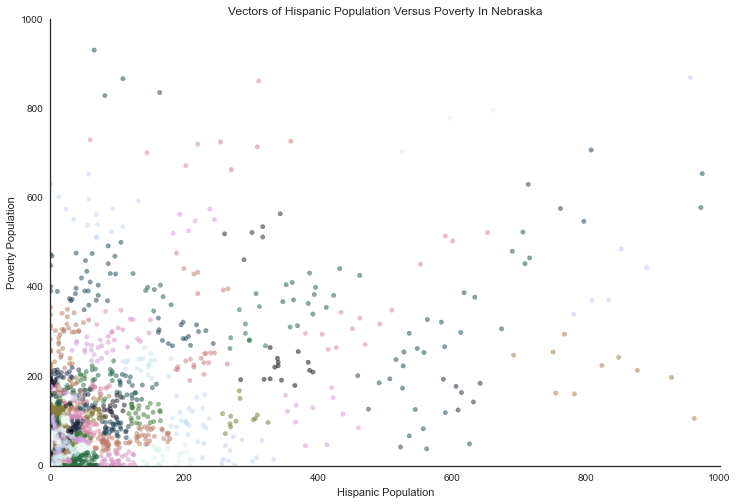

In [169]:
sns.set_style("white")
plt.figure(figsize=(12,8))

colors = sns.color_palette("cubehelix", 420)
C  =  map(lambda x: colors[x], data['AP_1_B'])
X2 = data['Hispanic_ACS_08_12'].values
Y2 = data['Prs_Blw_Pov_Lev_ACS_08_12'].values
X1 = np.zeros_like(X1)
Y1 = np.zeros_like(X2)

plt.scatter(X2, Y2, color=C,alpha=0.5)
#plt.plot(np.array([X1, X2]), np.array([Y1, Y2]), color="grey", alpha=0.1, linestyle=':')
plt.xlim([-1,1000])
plt.ylim([-1,1000])

#patch_1 = mpatches.Patch(color="red", label='Douglas County')
#patch_2 = mpatches.Patch(color="grey", label='Other')
#plt.legend(handles=[patch_1, patch_2])
plt.title("Vectors of Hispanic Population Versus Poverty In Nebraska")
plt.xlabel("Hispanic Population")
plt.ylabel("Poverty Population")

sns.despine()
plt.draw()
plt.show()

In [167]:
len(np.unique(data['AP_1_B']))

420